<a href="https://colab.research.google.com/github/AarushiKamboj/BOOK-SENTIMENT-ANALYSIS-USING-NLP/blob/main/BOOK_SENTIMENT_ANALYSIS_USING_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment-2**

---



In [ ]:
!pip install requests
!pip install beautifulsoup4

In [ ]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle

# Scrapes transcript data from scrapsfromtheloft.com
def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find(class_="site-content").find_all("p")]
    print(url)
    return text

# URLs of transcripts in scope
urls = ['https://scrapsfromtheloft.com/books/yanis-varoufakis-technofeudalism-american-big-tech-has-enslaved-us/',
        'https://scrapsfromtheloft.com/books/john-gray-everything-you-know-about-the-future-is-wrong/',
        'https://scrapsfromtheloft.com/books/the-fall-of-the-house-of-usher-1839-by-edgar-allan-poe/',
        'https://scrapsfromtheloft.com/books/2021-year-milley-halted-nuclear-chaos/',
        'https://scrapsfromtheloft.com/books/complete-works-of-oscar-wilde-vyvyan-holland-introduction/',
        'https://scrapsfromtheloft.com/books/oscar-wildes-de-profundis-tale-of-art-pain-and-redemption/',
        'https://scrapsfromtheloft.com/books/joan-didion-on-keeping-a-notebook/',
        'https://scrapsfromtheloft.com/books/mark-twain-damned-human-race/',
        'https://scrapsfromtheloft.com/history/war-and-slaves-in-ancient-greece-and-rome-luciano-canfora/',
        'https://scrapsfromtheloft.com/books/fall-of-house-of-usher-allegory-of-artist/',
        'https://scrapsfromtheloft.com/books/mary-mccarthy-on-hannah-arendt-origins-of-totalitarianism/',
        'https://scrapsfromtheloft.com/books/judith-jarvis-thomson-a-defense-of-abortion/']

# Author names
author = ['yanis', 'john', 'edgar', 'luca', 'vyvyan', 'Guido', 'joan', 'mark', 'Luciano', 'Hoffman', 'Hannah', 'Judith']

In [ ]:
 # Actually request transcripts (takes a few minutes to run)
transcripts = [url_to_transcript(u) for u in urls]

https://scrapsfromtheloft.com/books/yanis-varoufakis-technofeudalism-american-big-tech-has-enslaved-us/
https://scrapsfromtheloft.com/books/john-gray-everything-you-know-about-the-future-is-wrong/
https://scrapsfromtheloft.com/books/the-fall-of-the-house-of-usher-1839-by-edgar-allan-poe/
https://scrapsfromtheloft.com/books/2021-year-milley-halted-nuclear-chaos/
https://scrapsfromtheloft.com/books/complete-works-of-oscar-wilde-vyvyan-holland-introduction/
https://scrapsfromtheloft.com/books/oscar-wildes-de-profundis-tale-of-art-pain-and-redemption/
https://scrapsfromtheloft.com/books/joan-didion-on-keeping-a-notebook/
https://scrapsfromtheloft.com/books/mark-twain-damned-human-race/
https://scrapsfromtheloft.com/history/war-and-slaves-in-ancient-greece-and-rome-luciano-canfora/
https://scrapsfromtheloft.com/books/fall-of-house-of-usher-allegory-of-artist/
https://scrapsfromtheloft.com/books/mary-mccarthy-on-hannah-arendt-origins-of-totalitarianism/
https://scrapsfromtheloft.com/books/ju

In [ ]:
# Make a new directory to hold the text files
!mkdir -p transcripts

# Pickle files for later use
for i, c in enumerate(author):
    with open("transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)

# Load pickled files
data = {}
for i, c in enumerate(author):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [ ]:
# Double check to make sure data has been loaded properly
data.keys()

dict_keys(['yanis', 'john', 'edgar', 'luca', 'vyvyan', 'Guido', 'joan', 'mark', 'Luciano', 'Hoffman', 'Hannah', 'Judith'])

In [ ]:
# More checks
data['edgar'][:2]

['In Edgar Allan Poe’s The Fall of the House of Usher, the narrator describes a haunting visit to the eerie and decaying Usher mansion, where he encounters his childhood friend Roderick Usher, who suffers from acute anxiety and a morbid sensitivity to sensory stimuli. Roderick’s twin sister, Madeline, is gravely ill with a mysterious condition that leaves her cataleptic. The narrative unfolds in a gloomy atmosphere, filled with foreboding and supernatural elements, as the narrator witnesses the psychological disintegration of Roderick and the bizarre events leading up to Madeline’s death and terrifying return from the grave. The story culminates in the literal and metaphorical collapse of the Usher house into the dark tarn that mirrors it, symbolizing the end of the Usher family line and the inescapable doom of their ancient curse. Poe masterfully weaves themes of fear, isolation, and madness, creating a quintessential Gothic tale that explores the depths of human despair and the fragi

In [ ]:
# Let's take a look at our data again
next(iter(data.keys()))

'yanis'

In [ ]:
next(iter(data.values()))

['In his book, ‘Technofeudalism: What Killed Capitalism’, Yanis Varoufakis explores how giant tech firms, both in the US and China are expanding their control over the planet. His analysis is that, whilst material resources certainly matter, the real battle ground is over digital real estate.',
 'Varoufakis, a renowned economist and political thinker, presents a future where the digital age has not ushered in the equitable, socialist utopia many had hoped for but has instead birthed a new form of inequality and economic disparity reminiscent of feudal times, yet distinctly marked by digital characteristics.',
 'The foundation of Varoufakis’s argument rests on the observation that the digital giants—companies like Google, Uber, Facebook, Apple, and Amazon—have amassed unprecedented power and wealth, not merely through traditional capitalist means but by establishing monopolies over digital platforms and resources. These companies, according to Varoufakis, are the new lords of a techno-f

In [ ]:
# We are going to change this to key: author, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [ ]:
# Combining it in new dictionay
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [ ]:
# We can either keep it in dictionary format or put it into a pandas dataframe (row author , column transcript)
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

transcript
Guido    Exploring the Depths of Wilde’s Most Personal Work by Guido Bulla De Profundis is the letter penned by Oscar Wilde, incarcerated for homosexuality...
Hannah   Newport RFD 2\nRhode Island\n4/26/51 Dear Hannah:\nI’ve read your book [The Origins of Totalitarianism], absorbed, for the past two weeks, in the ...
Hoffman  by Daniel Hoffman Although written in 1839 … ‘The Fall of the House of Usher’ seems a thesaurus not only of Gothic clichés but also of nearly all ...
Judith   by Judith Jarvis Thomson Most opposition to abortion relies on the premise that the fetus is a human being, a person, from the moment of conceptio...
Luciano  Luciano Canfora’s new book shows how war was used by ancient societies to secure resources. Ancient societies were unequivocally characterized by ...
edgar    In Edgar Allan Poe’s The Fall of the House of Usher, the narrator describes a haunting visit to the eerie and decaying Usher mansion, where he enc...
joan     by Joan Didion “ ‘That woman Estelle,’ ” the note reads, “ ‘is partly the reason why George Sharp and I are separated today.’ Dirty crepe-de-Chine...
john     Crossroads of Empire: John Gray’s Vision of Political Realignment and the Fate of the West John Gray, the prolific political philosopher, has long...
luca     CAPITOL HILL, THREE YEARS ON COUP IN WASHINGTON. In the days following the election, fears mounted that an unhinged Trump might bomb Iran. The Joi...
mark     by Mark Twain I have been studying the traits and dispositions of the “lower ani­mals” (so-called), and contrasting them with the traits and dispo...
vyvyan   Vyvyan Holland, in his introduction to the 1966 edition of Oscar Wilde’s works, provides an insightful overview of his father’s lineage, life, and...
yanis    In his book, ‘Technofeudalism: What Killed Capitalism’, Yanis Varoufakis explores how giant tech firms, both in the US and China are expanding the...

In [ ]:
# Let's take a look at the transcript for Hoffman
data_df.transcript.loc['Hoffman']

'by Daniel Hoffman Although written in 1839 … ‘The Fall of the House of Usher’ seems a thesaurus not only of Gothic clichés but also of nearly all of Poe’s obsessional motifs; here joined together in a dazzling, garish, and intricately consistent pattern of con\xadcentric meanings. Because all tends toward the final annihi\xadlation, some critics have succumbed to the temptation to read the tale as a dramatization of Eureka [another Poe novel]. True, all of Poe’s tales partake of the same fixities which he so bravely schematized there, yet I do not believe that any writer of successful fictions undertakes to tell a tale in order to demonstrate his theory of the cosmos. On the contrary, he more likely is driven by the imaginative pres\xadsure of his fictions to construct such a theory that will jus\xadtify and explain them…. In ‘The Fall of the House of Usher’ Poe completes what seems to me the tripartite division of functions in his most comprehensive and compelling tales. This is a fa

In [ ]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text) # word containing numbers
    return text

round1 = lambda x: clean_text_round1(x)

In [ ]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

transcript
Guido    exploring the depths of wilde’s most personal work by guido bulla de profundis is the letter penned by oscar wilde incarcerated for homosexuality ...
Hannah   newport rfd \nrhode island\n dear hannah\ni’ve read your book  absorbed for the past two weeks in the bathtub riding in the car waiting in line in...
Hoffman  by daniel hoffman although written in  … ‘the fall of the house of usher’ seems a thesaurus not only of gothic clichés but also of nearly all of p...
Judith   by judith jarvis thomson most opposition to abortion relies on the premise that the fetus is a human being a person from the moment of conception ...
Luciano  luciano canfora’s new book shows how war was used by ancient societies to secure resources ancient societies were unequivocally characterized by t...
edgar    in edgar allan poe’s the fall of the house of usher the narrator describes a haunting visit to the eerie and decaying usher mansion where he encou...
joan     by joan didion “ ‘that woman estelle’ ” the note reads “ ‘is partly the reason why george sharp and i are separated today’ dirty crepedechine wrap...
john     crossroads of empire john gray’s vision of political realignment and the fate of the west john gray the prolific political philosopher has long be...
luca     capitol hill three years on coup in washington in the days following the election fears mounted that an unhinged trump might bomb iran the joint c...
mark     by mark twain i have been studying the traits and dispositions of the “lower ani­mals” socalled and contrasting them with the traits and dispositi...
vyvyan   vyvyan holland in his introduction to the  edition of oscar wilde’s works provides an insightful overview of his father’s lineage life and literar...
yanis    in his book ‘technofeudalism what killed capitalism’ yanis varoufakis explores how giant tech firms both in the us and china are expanding their c...

In [ ]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [ ]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

transcript
Guido    exploring the depths of wildes most personal work by guido bulla de profundis is the letter penned by oscar wilde incarcerated for homosexuality i...
Hannah   newport rfd rhode island dear hannahive read your book  absorbed for the past two weeks in the bathtub riding in the car waiting in line in the gr...
Hoffman  by daniel hoffman although written in   the fall of the house of usher seems a thesaurus not only of gothic clichés but also of nearly all of poes...
Judith   by judith jarvis thomson most opposition to abortion relies on the premise that the fetus is a human being a person from the moment of conception ...
Luciano  luciano canforas new book shows how war was used by ancient societies to secure resources ancient societies were unequivocally characterized by th...
edgar    in edgar allan poes the fall of the house of usher the narrator describes a haunting visit to the eerie and decaying usher mansion where he encoun...
joan     by joan didion  that woman estelle  the note reads  is partly the reason why george sharp and i are separated today dirty crepedechine wrapper hot...
john     crossroads of empire john grays vision of political realignment and the fate of the west john gray the prolific political philosopher has long bee...
luca     capitol hill three years on coup in washington in the days following the election fears mounted that an unhinged trump might bomb iran the joint c...
mark     by mark twain i have been studying the traits and dispositions of the lower ani­mals socalled and contrasting them with the traits and disposition...
vyvyan   vyvyan holland in his introduction to the  edition of oscar wildes works provides an insightful overview of his fathers lineage life and literary ...
yanis    in his book technofeudalism what killed capitalism yanis varoufakis explores how giant tech firms both in the us and china are expanding their con...

In [ ]:
# Let's take a look at our dataframe
data_df

transcript
Guido    Exploring the Depths of Wilde’s Most Personal Work by Guido Bulla De Profundis is the letter penned by Oscar Wilde, incarcerated for homosexuality...
Hannah   Newport RFD 2\nRhode Island\n4/26/51 Dear Hannah:\nI’ve read your book [The Origins of Totalitarianism], absorbed, for the past two weeks, in the ...
Hoffman  by Daniel Hoffman Although written in 1839 … ‘The Fall of the House of Usher’ seems a thesaurus not only of Gothic clichés but also of nearly all ...
Judith   by Judith Jarvis Thomson Most opposition to abortion relies on the premise that the fetus is a human being, a person, from the moment of conceptio...
Luciano  Luciano Canfora’s new book shows how war was used by ancient societies to secure resources. Ancient societies were unequivocally characterized by ...
edgar    In Edgar Allan Poe’s The Fall of the House of Usher, the narrator describes a haunting visit to the eerie and decaying Usher mansion, where he enc...
joan     by Joan Didion “ ‘That woman Estelle,’ ” the note reads, “ ‘is partly the reason why George Sharp and I are separated today.’ Dirty crepe-de-Chine...
john     Crossroads of Empire: John Gray’s Vision of Political Realignment and the Fate of the West John Gray, the prolific political philosopher, has long...
luca     CAPITOL HILL, THREE YEARS ON COUP IN WASHINGTON. In the days following the election, fears mounted that an unhinged Trump might bomb Iran. The Joi...
mark     by Mark Twain I have been studying the traits and dispositions of the “lower ani­mals” (so-called), and contrasting them with the traits and dispo...
vyvyan   Vyvyan Holland, in his introduction to the 1966 edition of Oscar Wilde’s works, provides an insightful overview of his father’s lineage, life, and...
yanis    In his book, ‘Technofeudalism: What Killed Capitalism’, Yanis Varoufakis explores how giant tech firms, both in the US and China are expanding the...

In [ ]:
# Let's add the authors full names as well
full_names = ['Guido-bulla', 'Hannah-gillis', 'Hoffman-freid', 'Judith-martin', 'Luciano-chappelle', 'edgar-allan poe',
              'joan-ansari', 'john-didion', 'luca-notaro', 'mark-milley', 'vyvyan-Holland', 'yanis-carlin']
full_names.sort()
data_df['full_name'] = full_names
data_df

transcript  \
Guido    Exploring the Depths of Wilde’s Most Personal Work by Guido Bulla De Profundis is the letter penned by Oscar Wilde, incarcerated for homosexuality...   
Hannah   Newport RFD 2\nRhode Island\n4/26/51 Dear Hannah:\nI’ve read your book [The Origins of Totalitarianism], absorbed, for the past two weeks, in the ...   
Hoffman  by Daniel Hoffman Although written in 1839 … ‘The Fall of the House of Usher’ seems a thesaurus not only of Gothic clichés but also of nearly all ...   
Judith   by Judith Jarvis Thomson Most opposition to abortion relies on the premise that the fetus is a human being, a person, from the moment of conceptio...   
Luciano  Luciano Canfora’s new book shows how war was used by ancient societies to secure resources. Ancient societies were unequivocally characterized by ...   
edgar    In Edgar Allan Poe’s The Fall of the House of Usher, the narrator describes a haunting visit to the eerie and decaying Usher mansion, where he enc...   
joan     by Joan Didion “ ‘That woman Estelle,’ ” the note reads, “ ‘is partly the reason why George Sharp and I are separated today.’ Dirty crepe-de-Chine...   
john     Crossroads of Empire: John Gray’s Vision of Political Realignment and the Fate of the West John Gray, the prolific political philosopher, has long...   
luca     CAPITOL HILL, THREE YEARS ON COUP IN WASHINGTON. In the days following the election, fears mounted that an unhinged Trump might bomb Iran. The Joi...   
mark     by Mark Twain I have been studying the traits and dispositions of the “lower ani­mals” (so-called), and contrasting them with the traits and dispo...   
vyvyan   Vyvyan Holland, in his introduction to the 1966 edition of Oscar Wilde’s works, provides an insightful overview of his father’s lineage, life, and...   
yanis    In his book, ‘Technofeudalism: What Killed Capitalism’, Yanis Varoufakis explores how giant tech firms, both in the US and China are expanding the...   

                 full_name  
Guido          Guido-bulla  
Hannah       Hannah-gillis  
Hoffman      Hoffman-freid  
Judith       Judith-martin  
Luciano  Luciano-chappelle  
edgar      edgar-allan poe  
joan           joan-ansari  
john           john-didion  
luca           luca-notaro  
mark           mark-milley  
vyvyan      vyvyan-Holland  
yanis         yanis-carlin

In [ ]:
# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

In [ ]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = data_clean.index

In [ ]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [ ]:
  # Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

Additional

In [ ]:
print("Before Second Round of Cleaning:")
print(data_clean['transcript'].head())

Before Second Round of Cleaning:
Guido      exploring the depths of wildes most personal work by guido bulla de profundis is the letter penned by oscar wilde incarcerated for homosexuality i...
Hannah     newport rfd rhode island dear hannahive read your book  absorbed for the past two weeks in the bathtub riding in the car waiting in line in the gr...
Hoffman    by daniel hoffman although written in   the fall of the house of usher seems a thesaurus not only of gothic clichés but also of nearly all of poes...
Judith     by judith jarvis thomson most opposition to abortion relies on the premise that the fetus is a human being a person from the moment of conception ...
Luciano    luciano canforas new book shows how war was used by ancient societies to secure resources ancient societies were unequivocally characterized by th...
Name: transcript, dtype: object


In [ ]:
#1  second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)

    # Additional regular expression to remove URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(' +', ' ', text)  # Replacing multiple spaces with a single space



    return text

round2 = lambda x: clean_text_round2(x)

data_clean = pd.DataFrame(data_clean.transcript.apply(round2))

In [ ]:
data_clean

transcript
Guido    exploring the depths of wildes most personal work by guido bulla de profundis is the letter penned by oscar wilde incarcerated for homosexuality i...
Hannah   newport rfd rhode island dear hannahive read your book absorbed for the past two weeks in the bathtub riding in the car waiting in line in the gro...
Hoffman  by daniel hoffman although written in the fall of the house of usher seems a thesaurus not only of gothic clichés but also of nearly all of poes o...
Judith   by judith jarvis thomson most opposition to abortion relies on the premise that the fetus is a human being a person from the moment of conception ...
Luciano  luciano canforas new book shows how war was used by ancient societies to secure resources ancient societies were unequivocally characterized by th...
edgar    in edgar allan poes the fall of the house of usher the narrator describes a haunting visit to the eerie and decaying usher mansion where he encoun...
joan     by joan didion that woman estelle the note reads is partly the reason why george sharp and i are separated today dirty crepedechine wrapper hotel ...
john     crossroads of empire john grays vision of political realignment and the fate of the west john gray the prolific political philosopher has long bee...
luca     capitol hill three years on coup in washington in the days following the election fears mounted that an unhinged trump might bomb iran the joint c...
mark     by mark twain i have been studying the traits and dispositions of the lower ani­mals socalled and contrasting them with the traits and disposition...
vyvyan   vyvyan holland in his introduction to the edition of oscar wildes works provides an insightful overview of his fathers lineage life and literary c...
yanis    in his book technofeudalism what killed capitalism yanis varoufakis explores how giant tech firms both in the us and china are expanding their con...

In [ ]:
import nltk   ##Natural Language Toolkit
from nltk.corpus import stopwords
nltk.download('punkt')

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text_round3(text):
    '''Remove stopwords and perform additional cleaning in the third round.'''
    # Tokenize the text
    words = nltk.word_tokenize(text)

    # Remove stopwords
    words = [word for word in words if word.lower() not in stop_words]

    # Join the words back into a string
    text = ' '.join(words)



    return text

round3 = lambda x: clean_text_round3(x)

data_clean = pd.DataFrame(data_clean.transcript.apply(round3))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data_clean

transcript
Guido    exploring depths wildes personal work guido bulla de profundis letter penned oscar wilde incarcerated homosexuality reading prison early months ad...
Hannah   newport rfd rhode island dear hannahive read book absorbed past two weeks bathtub riding car waiting line grocery store seems truly extraordinary ...
Hoffman  daniel hoffman although written fall house usher seems thesaurus gothic clichés also nearly poes obsessional motifs joined together dazzling garis...
Judith   judith jarvis thomson opposition abortion relies premise fetus human person moment conception premise argued think well take example common argume...
Luciano  luciano canforas new book shows war used ancient societies secure resources ancient societies unequivocally characterized institution slavery asse...
edgar    edgar allan poes fall house usher narrator describes haunting visit eerie decaying usher mansion encounters childhood friend roderick usher suffer...
joan     joan didion woman estelle note reads partly reason george sharp separated today dirty crepedechine wrapper hotel bar wilmington rr august monday m...
john     crossroads empire john grays vision political realignment fate west john gray prolific political philosopher long figure intrigue controversy past...
luca     capitol hill three years coup washington days following election fears mounted unhinged trump might bomb iran joint chiefs chairman alerted team c...
mark     mark twain studying traits dispositions lower ani­mals socalled contrasting traits dispositions man find result humiliating obliges renounce alleg...
vyvyan   vyvyan holland introduction edition oscar wildes works provides insightful overview fathers lineage life literary career recounts familys dutch or...
yanis    book technofeudalism killed capitalism yanis varoufakis explores giant tech firms us china expanding control planet analysis whilst material resou...

In [ ]:
#2
from sklearn.feature_extraction.text import CountVectorizer

#  max_features
cv_max_features = CountVectorizer(stop_words='english', max_features=1000)
data_cv_max_features = cv_max_features.fit_transform(data_clean.transcript)
data_dtm_max_features = pd.DataFrame(data_cv_max_features.toarray(), columns=cv_max_features.get_feature_names_out())
data_dtm_max_features.index = data_clean.index
print(data_dtm_max_features)

         ability  able  abortion  accede  access  according  account  act  \
Guido          0     0         0       0       1          1        0    0   
Hannah         0     0         0       0       1          0        0    0   
Hoffman        0     2         0       0       0          1        0    0   
Judith         0     1        56       5       0          0        4    8   
Luciano        0     0         0       0       0          0        0    0   
edgar          0     0         0       0       0          0        4    0   
joan           0     2         0       0       0          0        2    0   
john           6     0         0       0       0          3        0    0   
luca           0     0         0       0       0          1        0    0   
mark           2     3         0       0       0          1        0    1   
vyvyan         0     0         0       0       0          0        0    0   
yanis          1     0         0       0       4          4        0    2   

In [ ]:
# max_df and min_df
cv_df_thresholds = CountVectorizer(stop_words='english', max_df=0.85, min_df=0.1)
data_cv_df_thresholds = cv_df_thresholds.fit_transform(data_clean.transcript)
data_dtm_df_thresholds = pd.DataFrame(data_cv_df_thresholds.toarray(), columns=cv_df_thresholds.get_feature_names_out())
data_dtm_df_thresholds.index = data_clean.index
print(data_dtm_df_thresholds)

         ability  able  abroad  abruptly  absolute  absorbed  abstraction  \
Guido          0     0       0         0         0         0            0   
Hannah         0     0       0         0         0         1            0   
Hoffman        0     2       0         1         0         0            1   
Judith         0     1       1         0         1         0            0   
Luciano        0     0       0         0         0         1            0   
edgar          0     0       1         3         1         0            1   
joan           0     2       0         0         0         0            0   
john           6     0       1         0         0         0            0   
luca           0     0       0         0         0         0            0   
mark           2     3       0         0         0         0            0   
vyvyan         0     0       0         0         0         0            0   
yanis          1     0       0         0         0         0            0   

In [ ]:
#ngram_range
cv_ngram = CountVectorizer(stop_words='english', ngram_range=(1, 2))
data_cv_ngram = cv_ngram.fit_transform(data_clean.transcript)
data_dtm_ngram = pd.DataFrame(data_cv_ngram.toarray(), columns=cv_ngram.get_feature_names_out())
data_dtm_ngram.index = data_clean.index
print(data_dtm_ngram)

         aaron  aaron bastanis  ab  ab scesses  abandon  abandon life  \
Guido        0               0   0           0        0             0   
Hannah       0               0   0           0        0             0   
Hoffman      0               0   0           0        0             0   
Judith       0               0   0           0        0             0   
Luciano      0               0   0           0        0             0   
edgar        0               0   0           0        2             1   
joan         0               0   0           0        0             0   
john         1               1   0           0        0             0   
luca         0               0   0           0        0             0   
mark         0               0   1           1        0             0   
vyvyan       0               0   0           0        0             0   
yanis        0               0   0           0        0             0   

         abandon persuasion  abandoned  abandoned 

**ASSIGNMENT-3**

---











**EXPLORATORY DATA ANALYSIS**

---



In [ ]:
dtm_file_path = "dtm.pkl"

# Read in the document-term matrix from the pickle file
data_dtm = pd.read_pickle(dtm_file_path)

data_dtm

aaron  ab  abandon  abandoned  aberdeen  aberration  abeyance  \
Guido        0   0        0          0         0           0         0   
Hannah       0   0        0          0         0           0         0   
Hoffman      0   0        0          0         0           0         0   
Judith       0   0        0          0         0           0         0   
Luciano      0   0        0          0         0           0         0   
edgar        0   0        2          0         0           0         1   
joan         0   0        0          1         0           0         0   
john         1   0        0          0         0           1         0   
luca         0   0        0          0         0           0         0   
mark         0   1        0          0         1           0         0   
vyvyan       0   0        0          0         0           0         0   
yanis        0   0        0          0         0           0         0   

         abhorrence  ability  able  ...  yoursmary  youth  youve  zealot  \
Guido             0        0     0  ...          0      1      0       0   
Hannah            0        0     0  ...          1      0      0       0   
Hoffman           0        0     2  ...          0      0      0       0   
Judith            0        0     1  ...          0      0      1       0   
Luciano           0        0     0  ...          0      1      0       0   
edgar             1        0     0  ...          0      1      0       0   
joan              0        0     2  ...          0      0      0       0   
john              0        6     0  ...          0      0      0       0   
luca              0        0     0  ...          0      0      0       0   
mark              0        2     3  ...          0      0      0       1   
vyvyan            0        0     0  ...          0      2      0       0   
yanis             0        1     0  ...          0      0      0       0   

         zigzag  zone  zoological  zulu  zuocheng  ægipans  
Guido         0     1           0     0         0        0  
Hannah        0     0           0     0         0        0  
Hoffman       2     0           0     0         0        0  
Judith        0     0           0     0         0        0  
Luciano       0     0           0     0         0        0  
edgar         2     0           0     0         0        1  
joan          0     0           0     0         0        0  
john          0     0           0     0         0        0  
luca          0     0           0     0         2        0  
mark          0     0           1     4         0        0  
vyvyan        0     0           0     0         0        0  
yanis         0     0           0     0         0        0  

[12 rows x 7151 columns]

In [ ]:
# Find and print the top 30 words
# Sum the counts of each word across all documents
word_counts = data_dtm.sum()

# Sort the words based on their total counts in descending order
sorted_word_counts = word_counts.sort_values(ascending=False)

# Print the top 30 words
top_30_words = sorted_word_counts.head(30)
print(top_30_words)

right         127
life          127
economic      113
man            69
digital        67
person         65
house          63
social         61
usher          58
political      57
does           57
abortion       56
like           51
wilde          51
gray           49
use            48
new            48
power          44
did            42
varoufakis     42
way            39
world          37
grays          37
body           36
having         36
fact           34
said           34
just           34
long           34
good           33
dtype: int64


In [ ]:
# By looking at these top words, you can see that some of them have very little
# meaning and could be added to a stop words list, so let's do just that.
# Look at the most common top words and add them to the stop word list.


# List of the most common top words
common_top_words = sorted_word_counts.head(30).index.tolist()

# Print the common top words
print("Common Top Words:")
print(common_top_words)


from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
custom_stop_words = list(ENGLISH_STOP_WORDS) + common_top_words

# Printing the custom stop words
print("\nCustom Stop Words:")
print(custom_stop_words)

Common Top Words:
['right', 'life', 'economic', 'man', 'digital', 'person', 'house', 'social', 'usher', 'political', 'does', 'abortion', 'like', 'wilde', 'gray', 'use', 'new', 'power', 'did', 'varoufakis', 'way', 'world', 'grays', 'body', 'having', 'fact', 'said', 'just', 'long', 'good']

Custom Stop Words:
['together', 'thereafter', 'her', 'through', 'up', 'not', 'call', 'latter', 'on', 'thereby', 'couldnt', 'was', 'same', 'more', 'can', 'although', 'name', 'before', 'besides', 'than', 'however', 'against', 'when', 'it', 'into', 'us', 'otherwise', 'will', 'among', 'indeed', 'in', 'alone', 'become', 'though', 'what', 'seems', 'most', 'once', 'at', 'often', 'everywhere', 'afterwards', 'their', 'due', 'we', 'wherein', 'namely', 'mostly', 'bottom', 'something', 'yours', 'would', 'twenty', 'she', 'may', 'must', 'always', 'within', 'put', 'nothing', 'onto', 'after', 'full', 'sincere', 'herself', 'should', 'around', 'anyway', 'hereupon', 'therefore', 'somewhere', 'move', 're', 'our', 'fill',

In [ ]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in

# Create a new DataFrame with word counts aggregated across routines
word_occurrences = (data_dtm > 0).sum(axis=0)
#data_dtm is converted from dtm to binary to check if there is occurence of the word across any of the transcript , if yes then true and count =1 , axis =0 to check across all transcripts.

# Sort the words based on their total occurrences in descending order
sorted_word_occurrences = word_occurrences.sort_values(ascending=False)

# Print the top words and their occurrences
top_words_with_occurrences = sorted_word_occurrences.head(30)
print(top_words_with_occurrences)

website      12
fields       12
email        12
like         12
world        12
address      12
published    12
marked       12
required     12
new          11
way          10
human        10
life         10
order         9
place         9
make          9
book          9
thought       9
used          9
work          9
read          9
just          9
does          9
time          8
good          8
use           8
say           8
man           8
having        8
matter        8
dtype: int64


In [ ]:
# Create a new DataFrame with word counts aggregated across routines
word_occurrences = (data_dtm > 0).sum(axis=0)

# Filter out words that are top words for more than half of the authors
half_authors_count = len(data_dtm) / 2   #determining the threshold for whether the word is a top word or not .
filtered_word_occurrences = word_occurrences[word_occurrences <= half_authors_count] #select words less than the threshold

# Sort the remaining words based on their total occurrences in descending order
sorted_filtered_word_occurrences = filtered_word_occurrences.sort_values(ascending=False)

# Print the top words and their occurrences
top_words_with_occurrences = sorted_filtered_word_occurrences.head(30)
print(top_words_with_occurrences)

sense        6
right        6
american     6
common       6
physical     6
taken        6
known        6
dead         6
john         6
stay         6
views        6
despite      6
different    6
small        6
presence     6
present      6
drawing      6
events       6
fact         6
idea         6
family       6
far          6
room         6
felt         6
works        6
light        6
come         6
line         6
means        6
vast         6
dtype: int64


In [ ]:
# Read in cleaned data (replace 'data_clean.pkl' with the actual path to your cleaned data pickle file)
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words to an existing stop words list (e.g., scikit-learn's ENGLISH_STOP_WORDS)
stop_words = list(ENGLISH_STOP_WORDS) + custom_stop_words

# Recreate document-term matrix with the updated stop words
cv = CountVectorizer(stop_words=stop_words) #CountVectorizer is used to convert a collection of text documents into a matrix of token counts.
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = data_clean.index

# Pickle the updated document-term matrix for later use
data_dtm.to_pickle("updated_dtm.pkl")

In [ ]:
# Let's make some word clouds!


!pip install wordcloud


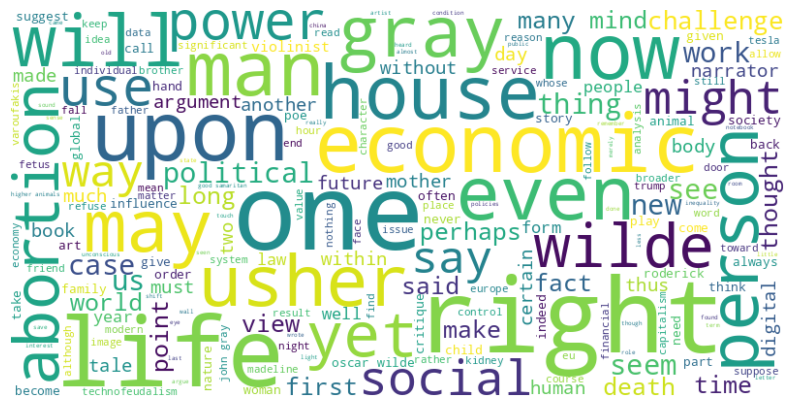

In [ ]:
# Import necessary libraries
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'data_dtm' is your document-term matrix DataFrame
data_dtm = pd.read_pickle('updated_dtm.pkl')

# Concatenate all transcripts into a single string
all_transcripts = ' '.join(data_clean.transcript) #This is necessary because the WordCloud library expects a single string input.

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, random_state=10, max_font_size=110, background_color='white').generate(all_transcripts)

# Plot the WordCloud image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

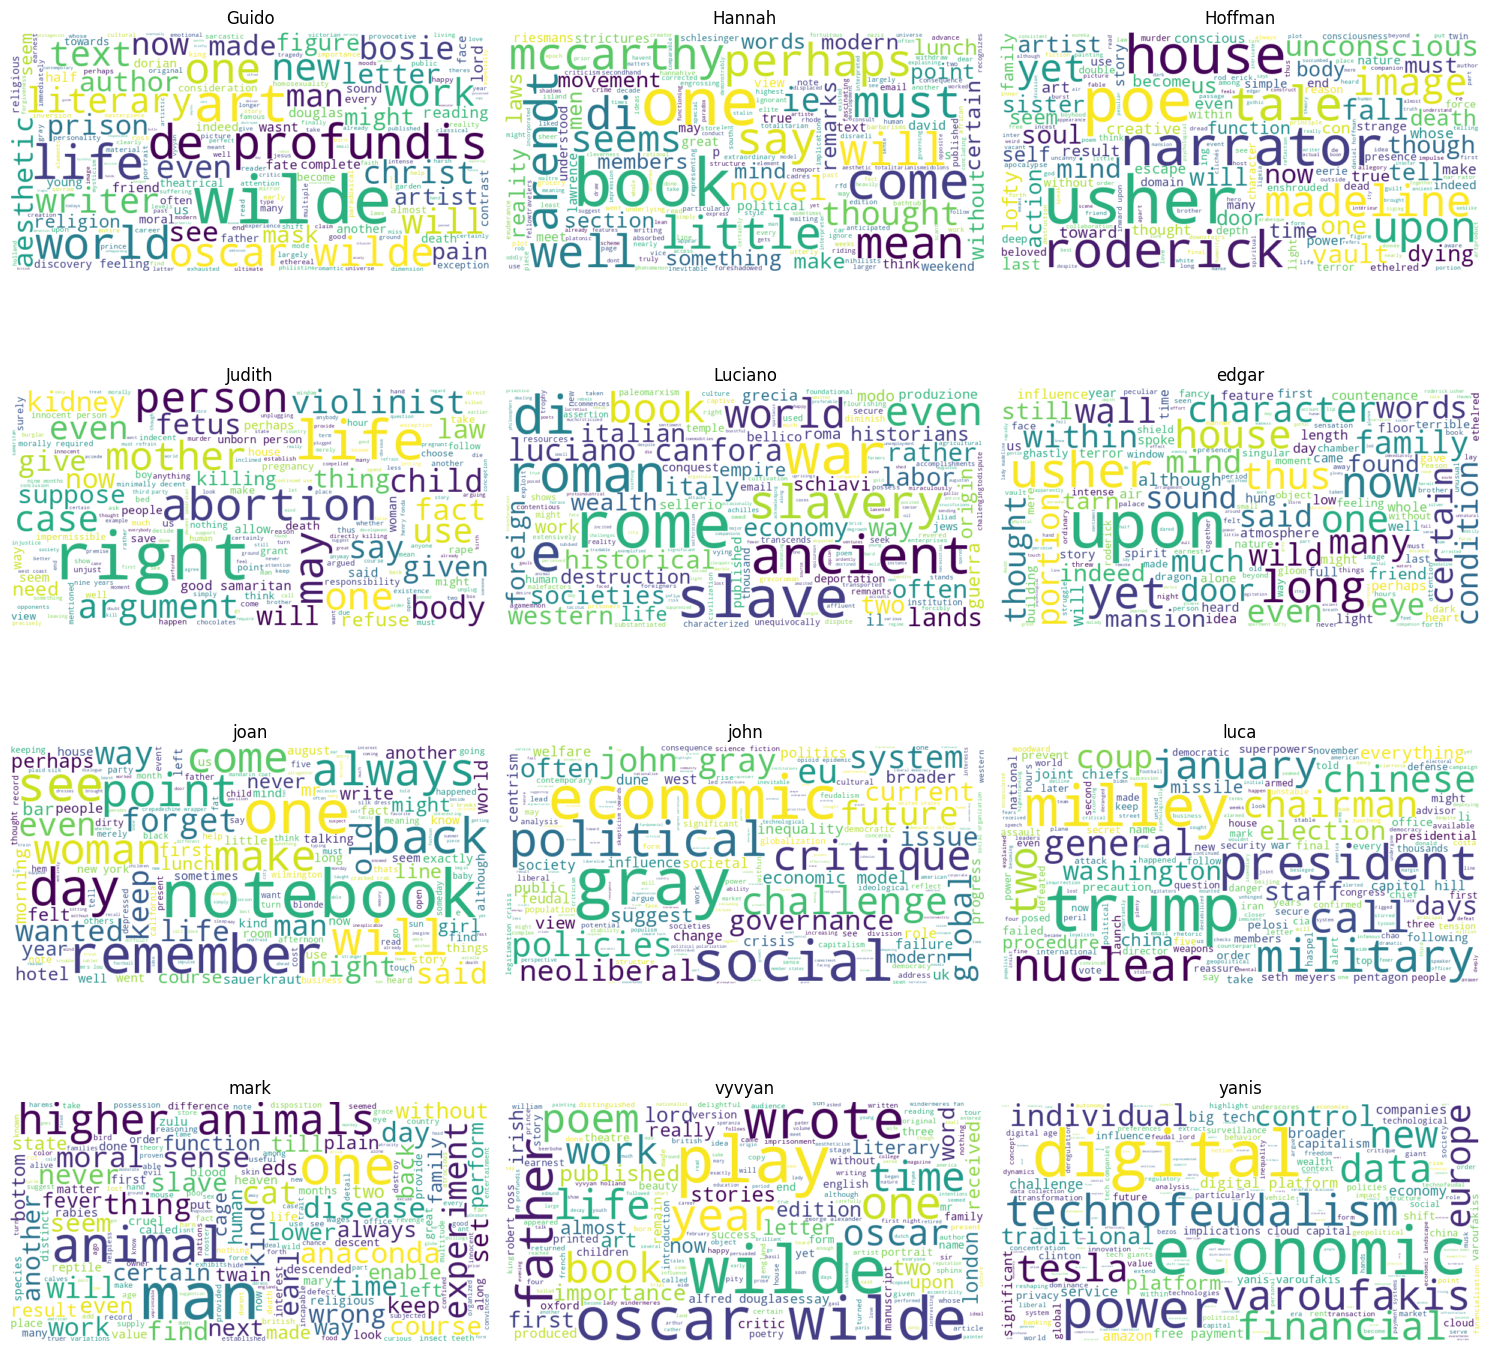

In [ ]:
# Assuming 'data_clean' is your cleaned data DataFrame
data_clean = pd.read_pickle('data_clean.pkl')

# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Set the number of rows and columns for subplots
num_rows = 4
num_cols = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Iterate through authors and create word clouds
for i, author in enumerate(data_clean.index):
    row = i // num_cols
    col = i % num_cols

    # Tokenize the transcript for the current author
    authors_transcript = data_clean.loc[author, 'transcript'].split()  # Assuming transcripts are whitespace-separated

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(' '.join(authors_transcript))

    # Plot the WordCloud image in the corresponding subplot
    axes[row, col].imshow(wordcloud, interpolation="bilinear")
    axes[row, col].axis('off')
    axes[row, col].set_title(author)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


**YOUR OBSERVATION**

---



There are some common top words
right

*   life
*   economic
*   man
*   digital
*   person
*   house








**ASSIGNMENT-2**

---



In [ ]:
#1 Find the number of unique words that each author uses

# Count the number of unique words for each author
unique_words_count = data_dtm.apply(lambda row: len(row[row > 0]), axis=1) #The lambda function counts the number of elements in each row where the value is greater than 0, rowwise

# Create a new column in the DataFrame to store the count of unique words
data_df['unique_words_count'] = unique_words_count

# Display the DataFrame with author names and their corresponding unique word counts
print(data_df[['full_name', 'unique_words_count']])


                 full_name  unique_words_count
Guido          Guido-bulla                 839
Hannah       Hannah-gillis                 314
Hoffman      Hoffman-freid                1180
Judith       Judith-martin                1142
Luciano  Luciano-chappelle                 368
edgar      edgar-allan poe                2013
joan           joan-ansari                 818
john           john-didion                1080
luca           luca-notaro                 511
mark           mark-milley                1039
vyvyan      vyvyan-Holland                 906
yanis         yanis-carlin                 925


In [ ]:
#this code snippet provides a detailed view of the non-zero entries in the document-term matrix, indicating which words appear in the transcripts of which authors and their respective counts.
import numpy as np

# Identify non-zero items in the document-term matrix
nonzero_indices = np.nonzero(data_dtm.values)

# Extract row and column indices
row_indices, col_indices = nonzero_indices

# Create a DataFrame to display the results
nonzero_items_df = pd.DataFrame({
    'Author': data_dtm.index[row_indices],
    'Word': data_dtm.columns[col_indices],
    'Count': data_dtm.values[row_indices, col_indices]
})

# Display the DataFrame with non-zero items
print(nonzero_items_df)

      Author          Word  Count
0      Guido       abounds      1
1      Guido      accepted      1
2      Guido        access      1
3      Guido     according      1
4      Guido  achievements      1
...      ...           ...    ...
11130  yanis       wielded      1
11131  yanis      wielding      1
11132  yanis          work      3
11133  yanis       workthe      1
11134  yanis         yanis     12

[11135 rows x 3 columns]


In [ ]:
# Create a new DataFrame for unique word count
unique_words_count_df = pd.DataFrame({
    'Author': data_df['full_name'],
    'Unique_Word_Count': data_df['unique_words_count']
})

# Display the new DataFrame
print(unique_words_count_df)

                    Author  Unique_Word_Count
Guido          Guido-bulla                839
Hannah       Hannah-gillis                314
Hoffman      Hoffman-freid               1180
Judith       Judith-martin               1142
Luciano  Luciano-chappelle                368
edgar      edgar-allan poe               2013
joan           joan-ansari                818
john           john-didion               1080
luca           luca-notaro                511
mark           mark-milley               1039
vyvyan      vyvyan-Holland                906
yanis         yanis-carlin                925


In [ ]:
# Calculate total words in each comedian transcript
total_words_per_author = data_dtm.sum(axis=1)

# Create a new DataFrame for total words
total_words_df = pd.DataFrame({
    'Author': data_df['full_name'],
    'Total_Words': total_words_per_author
})

# Display the new DataFrame with total words
print(total_words_df)


                    Author  Total_Words
Guido          Guido-bulla         1054
Hannah       Hannah-gillis          360
Hoffman      Hoffman-freid         1772
Judith       Judith-martin         2790
Luciano  Luciano-chappelle          429
edgar      edgar-allan poe         3200
joan           joan-ansari         1186
john           john-didion         2340
luca           luca-notaro          703
mark           mark-milley         1469
vyvyan      vyvyan-Holland         1349
yanis         yanis-carlin         2112


In [ ]:
# Example data (replace with your actual data)
total_words = [1056,365,1773,2811,433,3203,1188,2319,704,1471,1350,2100]  # Replace with the actual total words for each author
total_pages = [15,10,20,34,12,17,16,13,14,15,15,16]  # Replace with the total pages of each book

# Create a new DataFrame for words per minute
wpp_df = pd.DataFrame({
    'Author': data_df['full_name'],
    'Total_Words': total_words,
    'Total_Pages': total_pages
})

# Calculate words per minute
wpp_df['Words_Per_Pge'] = wpp_df['Total_Words'] / wpp_df['Total_Pages']

# Display the new DataFrame with words per minute
print(wpp_df)


                    Author  Total_Words  Total_Pages  Words_Per_Pge
Guido          Guido-bulla         1056           15      70.400000
Hannah       Hannah-gillis          365           10      36.500000
Hoffman      Hoffman-freid         1773           20      88.650000
Judith       Judith-martin         2811           34      82.676471
Luciano  Luciano-chappelle          433           12      36.083333
edgar      edgar-allan poe         3203           17     188.411765
joan           joan-ansari         1188           16      74.250000
john           john-didion         2319           13     178.384615
luca           luca-notaro          704           14      50.285714
mark           mark-milley         1471           15      98.066667
vyvyan      vyvyan-Holland         1350           15      90.000000
yanis         yanis-carlin         2100           16     131.250000


In [ ]:
# Add 'total_words' column to the existing DataFrame
data_df['total_words'] = total_words_df['Total_Words']

# Add 'total_pages' column (replace with your actual pages)
data_df['total_pages'] =[15,10,20,34,12,17,16,13,14,15,15,16]
# Calculate 'words per page'
data_df['words_per_book'] = data_df['total_words'] / data_df['total_pages']

# Display the updated DataFrame
print(data_df[['full_name', 'total_words', 'total_pages', 'words_per_book']])



                 full_name  total_words  total_pages  words_per_book
Guido          Guido-bulla         1054           15       70.266667
Hannah       Hannah-gillis          360           10       36.000000
Hoffman      Hoffman-freid         1772           20       88.600000
Judith       Judith-martin         2790           34       82.058824
Luciano  Luciano-chappelle          429           12       35.750000
edgar      edgar-allan poe         3200           17      188.235294
joan           joan-ansari         1186           16       74.125000
john           john-didion         2340           13      180.000000
luca           luca-notaro          703           14       50.214286
mark           mark-milley         1469           15       97.933333
vyvyan      vyvyan-Holland         1349           15       89.933333
yanis         yanis-carlin         2112           16      132.000000


In [ ]:
# Sort the DataFrame by 'words_per_minute' in ascending order
sorted_df = data_df.sort_values(by='words_per_book')

# Display the sorted DataFrame
print(sorted_df[['full_name', 'words_per_book']])


                 full_name  words_per_book
Luciano  Luciano-chappelle       35.750000
Hannah       Hannah-gillis       36.000000
luca           luca-notaro       50.214286
Guido          Guido-bulla       70.266667
joan           joan-ansari       74.125000
Judith       Judith-martin       82.058824
Hoffman      Hoffman-freid       88.600000
vyvyan      vyvyan-Holland       89.933333
mark           mark-milley       97.933333
yanis         yanis-carlin      132.000000
john           john-didion      180.000000
edgar      edgar-allan poe      188.235294


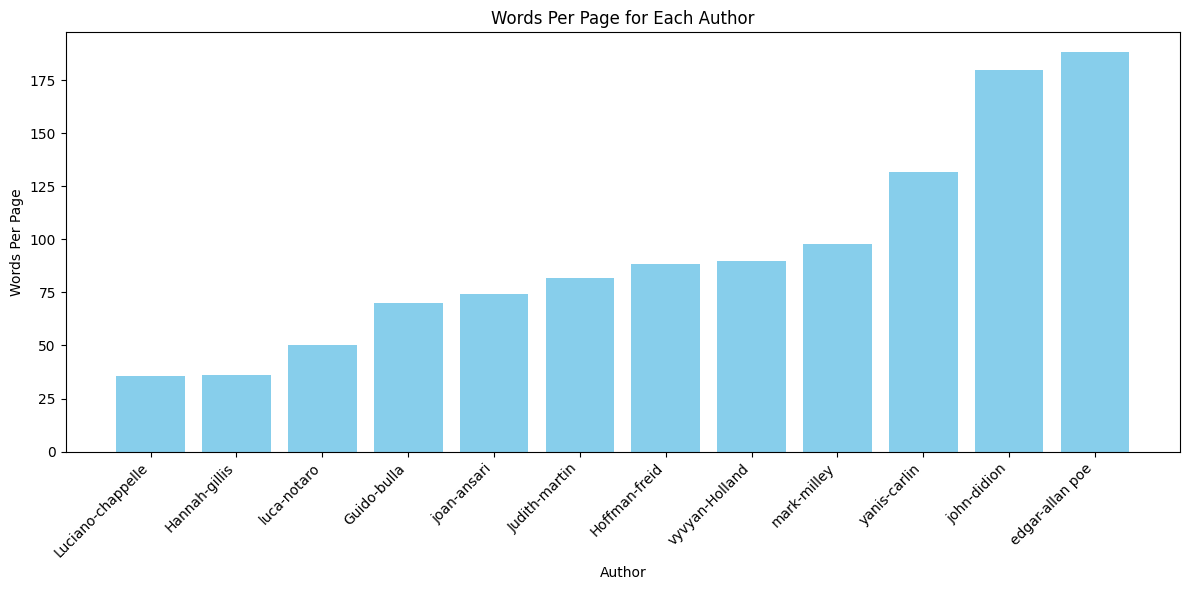

In [ ]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'words_per_page' in ascending order
sorted_df = data_df.sort_values(by='words_per_book')

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(sorted_df['full_name'], sorted_df['words_per_book'], color='skyblue')
plt.xlabel('Author')
plt.ylabel('Words Per Page')
plt.title('Words Per Page for Each Author')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#this code snippet creates a bar chart visualizing the words per page for each author, allowing for easy comparison of writing density among authors.
#understand writing habits , style,literary analysis , reader expectation, editorial consideration

**YOUR OBSERVATION**

---
. John-didion and edgar-allan poe use a lot of words in their book

#Using unique and meaningful words

· john-didion and edgar-allan poe uses more unique words

. Luciano-chappelle and Hannah-gilis uses less meaningful words

. vyvyan-holland and hoffman-freid are in middle


**ASSIGNMENT-3**

---



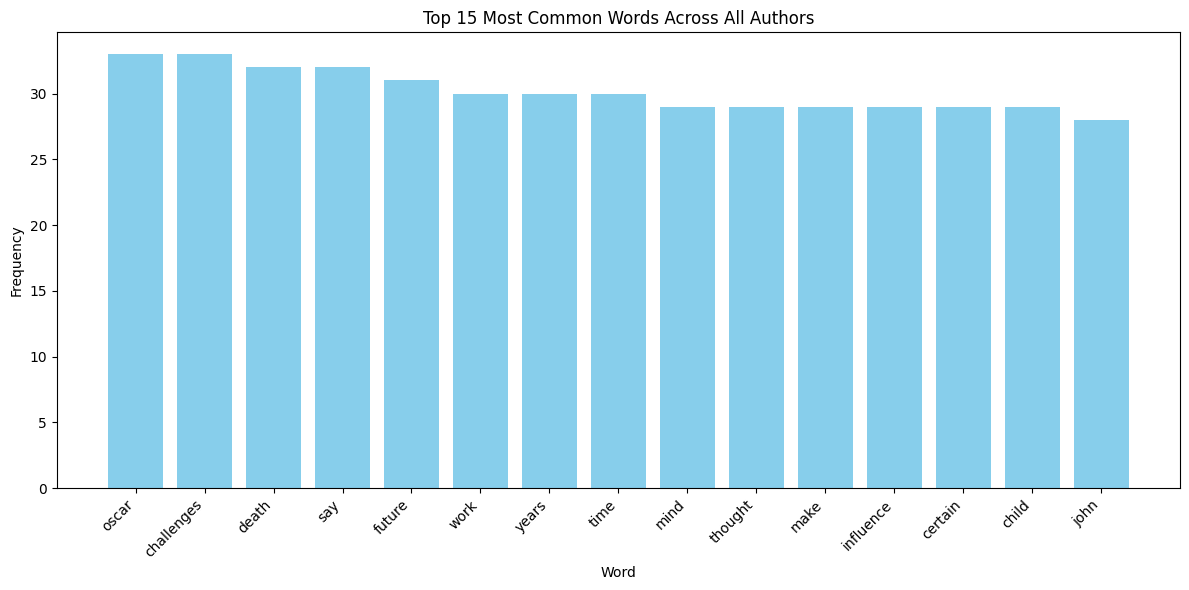

In [ ]:
# Calculate the total word frequencies across all authors
total_word_frequencies = data_dtm.sum()

# Create a DataFrame for the most common words
common_words_df = pd.DataFrame({
    'Word': total_word_frequencies.index,
    'Frequency': total_word_frequencies.values
})

# Sort the DataFrame by frequency in descending order
common_words_df = common_words_df.sort_values(by='Frequency', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(common_words_df['Word'][:15], common_words_df['Frequency'][:15], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 15 Most Common Words Across All Authors')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
#theme identification, writing style analysis ,content overview ,

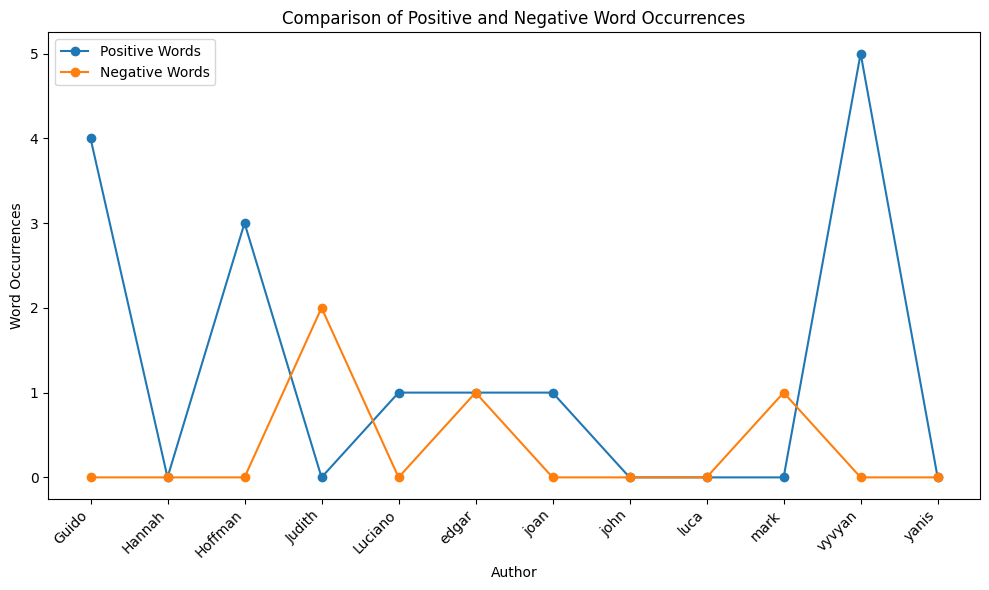

In [ ]:
# List of positive and negative words for comparison
positive_words = ['happy', 'joy', 'love', 'fun']
negative_words = ['sad', 'angry', 'hate', 'stress']

# Filter words that exist in the DTM columns
existing_positive_words = [word for word in positive_words if word in data_dtm.columns]
existing_negative_words = [word for word in negative_words if word in data_dtm.columns]

# Select relevant columns from the document-term matrix
positive_occurrences = data_dtm[existing_positive_words].sum(axis=1)
negative_occurrences = data_dtm[existing_negative_words].sum(axis=1)

# Create a DataFrame for word occurrences
word_comparison_df = pd.DataFrame({
    'Author': data_df['full_name'],
    'Positive_Occurrences': positive_occurrences,
    'Negative_Occurrences': negative_occurrences
})

# Plot the line plot
plt.figure(figsize=(10, 6))
plt.plot(word_comparison_df['Positive_Occurrences'], label='Positive Words', marker='o')
plt.plot(word_comparison_df['Negative_Occurrences'], label='Negative Words', marker='o')
plt.xlabel('Author')
plt.ylabel('Word Occurrences')
plt.title('Comparison of Positive and Negative Word Occurrences')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#sentiment /tone of writing , theme , character , narrative stratigies, genre /content analysis
#positive - happiness,joy,optimism
#negative-anger,sad,conflict

# Topic Modeling
## Introduction
Another popular text analysis technique is called topic modeling. The ultimate goal of topic modeling is to find various topics that are present in your corpus. Each document in the corpus will be made up of at least one topic, if not multiple topics.

In this notebook, we will be covering the steps on how to do **Latent Dirichlet Allocation (LDA)**, which is one of many topic modeling techniques. It was specifically designed for text data.

To use a topic modeling technique, you need to provide (1) a document-term matrix and (2) the number of topics you would like the algorithm to pick up.

Once the topic modeling technique is applied, your job as a human is to interpret the results and see if the mix of words in each topic make sense. If they don't make sense, you can try changing up the number of topics, the terms in the document-term matrix, model parameters, or even try a different model.

## Topic Modeling - Attempt #1 (All Text)

In [ ]:
import pandas as pd
import pickle

data = pd.read_pickle('data_clean.pkl')
data

transcript
Guido    exploring the depths of wildes most personal work by guido bulla de profundis is the letter penned by oscar wilde incarcerated for homosexuality i...
Hannah   newport rfd rhode island dear hannahive read your book  absorbed for the past two weeks in the bathtub riding in the car waiting in line in the gr...
Hoffman  by daniel hoffman although written in   the fall of the house of usher seems a thesaurus not only of gothic clichés but also of nearly all of poes...
Judith   by judith jarvis thomson most opposition to abortion relies on the premise that the fetus is a human being a person from the moment of conception ...
Luciano  luciano canforas new book shows how war was used by ancient societies to secure resources ancient societies were unequivocally characterized by th...
edgar    in edgar allan poes the fall of the house of usher the narrator describes a haunting visit to the eerie and decaying usher mansion where he encoun...
joan     by joan didion  that woman estelle  the note reads  is partly the reason why george sharp and i are separated today dirty crepedechine wrapper hot...
john     crossroads of empire john grays vision of political realignment and the fate of the west john gray the prolific political philosopher has long bee...
luca     capitol hill three years on coup in washington in the days following the election fears mounted that an unhinged trump might bomb iran the joint c...
mark     by mark twain i have been studying the traits and dispositions of the lower ani­mals socalled and contrasting them with the traits and disposition...
vyvyan   vyvyan holland in his introduction to the  edition of oscar wildes works provides an insightful overview of his fathers lineage life and literary ...
yanis    in his book technofeudalism what killed capitalism yanis varoufakis explores how giant tech firms both in the us and china are expanding their con...

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# remove stop words from the data
cv = CountVectorizer(stop_words='english', min_df=3, max_df=0.8)

# Fit and transform the 'transcript' column of the DataFrame
dtm = cv.fit_transform(data['transcript'])

# Convert the term-document matrix to a DataFrame
dtm_df = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names_out())

# Set the index of the DataFrame to match the index of the original DataFrame
dtm_df.index = data.index

# Print the resulting term-document matrix DataFrame
print(dtm_df)

# Save the term-document matrix DataFrame to a pickle file
dtm_df.to_pickle('dtm.pkl')

# Save the CountVectorizer object to a pickle file
with open('cv.pkl', 'wb') as f:
    pickle.dump(cv, f)


         ability  able  abroad  accepted  access  according  account  act  \
Guido          0     0       0         1       1          1        0    0   
Hannah         0     0       0         0       1          0        0    0   
Hoffman        0     2       0         0       0          1        0    0   
Judith         0     1       1         1       0          0        4    8   
Luciano        0     0       0         0       0          0        0    0   
edgar          0     0       1         0       0          0        4    0   
joan           0     2       0         0       0          0        2    0   
john           6     0       1         1       0          3        0    0   
luca           0     0       0         0       0          1        0    0   
mark           2     3       0         0       0          1        0    1   
vyvyan         0     0       0         0       0          0        0    0   
yanis          1     0       0         0       4          4        0    2   

In [ ]:
# Let's read in our document-term matrix
import pandas as pd
import pickle

data = pd.read_pickle('dtm.pkl')
data

ability  able  abroad  accepted  access  according  account  act  \
Guido          0     0       0         1       1          1        0    0   
Hannah         0     0       0         0       1          0        0    0   
Hoffman        0     2       0         0       0          1        0    0   
Judith         0     1       1         1       0          0        4    8   
Luciano        0     0       0         0       0          0        0    0   
edgar          0     0       1         0       0          0        4    0   
joan           0     2       0         0       0          0        2    0   
john           6     0       1         1       0          3        0    0   
luca           0     0       0         0       0          1        0    0   
mark           2     3       0         0       0          1        0    1   
vyvyan         0     0       0         0       0          0        0    0   
yanis          1     0       0         0       4          4        0    2   

         acting  action  ...  worth  writer  writing  written  wrong  year  \
Guido         0       0  ...      0       5        1        0      1     1   
Hannah        0       0  ...      0       0        1        0      0     0   
Hoffman       1       3  ...      0       1        0        1      0     0   
Judith        1       0  ...      1       0        0        0      3     0   
Luciano       0       0  ...      0       0        0        0      0     0   
edgar         1       1  ...      0       1        0        1      0     1   
joan          0       0  ...      0       0        1        0      1     1   
john          1       2  ...      0       0        0        0      0     0   
luca          0       0  ...      0       0        0        0      0     0   
mark          0       0  ...      1       0        0        0      6     0   
vyvyan        0       0  ...      1       0        3        3      0     3   
yanis         1       1  ...      0       0        0        0      0     0   

         years  york  young  youth  
Guido        1     0      3      1  
Hannah       0     0      0      0  
Hoffman      0     0      0      0  
Judith       8     3      0      0  
Luciano      0     0      1      1  
edgar        5     0      0      1  
joan         5     4      1      0  
john         0     0      0      0  
luca         2     0      0      0  
mark         1     0      1      0  
vyvyan       8     1      2      2  
yanis        0     0      0      0  

[12 rows x 925 columns]

In [ ]:
# Import the necessary modules for LDA with gensim

from gensim import matutils, models
import scipy.sparse



In [ ]:
# One of the required inputs is a term-document matrix
tdm = data.transpose()
tdm.head()


Guido  Hannah  Hoffman  Judith  Luciano  edgar  joan  john  luca  \
ability       0       0        0       0        0      0     0     6     0   
able          0       0        2       1        0      0     2     0     0   
abroad        0       0        0       1        0      1     0     1     0   
accepted      1       0        0       1        0      0     0     1     0   
access        1       1        0       0        0      0     0     0     0   

          mark  vyvyan  yanis  
ability      2       0      1  
able         3       0      0  
abroad       0       0      0  
accepted     0       0      0  
access       0       0      4

In [ ]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)  # compressed sparse rows - good for non zero elements
corpus = matutils.Sparse2Corpus(sparse_counts)  # convert to gensim corpus - need for i/p to gensim modelling algo
print(corpus)

In [ ]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix

cv = pickle.load(open("cv.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())
print(id2word)

{190: 'depths', 613: 'personal', 911: 'work', 463: 'letter', 676: 'reading', 653: 'prison', 234: 'early', 537: 'months', 491: 'lord', 705: 'responsible', 290: 'fate', 245: 'end', 328: 'friend', 333: 'future', 477: 'literary', 585: 'original', 738: 'sent', 75: 'british', 547: 'museum', 484: 'london', 343: 'good', 921: 'years', 796: 'strict', 136: 'condition', 666: 'public', 356: 'half', 96: 'century', 4: 'access', 828: 'text', 739: 'series', 131: 'complex', 447: 'largely', 100: 'chance', 257: 'events', 22: 'allowed', 675: 'read', 645: 'presented', 320: 'form', 438: 'knowing', 45: 'author', 412: 'intended', 277: 'eyes', 296: 'feeling', 352: 'grim', 376: 'history', 565: 'notion', 502: 'man', 164: 'critical', 44: 'attention', 335: 'general', 711: 'rich', 646: 'presenting', 530: 'mirrors', 824: 'temperament', 573: 'old', 38: 'art', 125: 'common', 540: 'mortal', 679: 'reality', 286: 'familiar', 699: 'renowned', 913: 'works', 620: 'picture', 348: 'gray', 393: 'importance', 235: 'earnest', 819

In [ ]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.029*"economic" + 0.015*"social" + 0.015*"political" + 0.012*"gray" + 0.011*"man" + 0.009*"power" + 0.009*"challenges" + 0.008*"future" + 0.007*"global" + 0.007*"work"'),
 (1,
  '0.024*"right" + 0.013*"person" + 0.012*"house" + 0.009*"does" + 0.009*"use" + 0.007*"did" + 0.007*"body" + 0.007*"said" + 0.006*"having" + 0.006*"fact"')]

In [ ]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.030*"man" + 0.011*"animal" + 0.010*"art" + 0.010*"time" + 0.008*"book" + 0.008*"work" + 0.007*"sense" + 0.006*"moral" + 0.006*"literary" + 0.006*"years"'),
 (1,
  '0.043*"economic" + 0.023*"social" + 0.022*"political" + 0.017*"gray" + 0.014*"power" + 0.013*"challenges" + 0.011*"global" + 0.011*"future" + 0.009*"significant" + 0.008*"influence"'),
 (2,
  '0.027*"right" + 0.014*"person" + 0.013*"house" + 0.010*"does" + 0.009*"use" + 0.008*"body" + 0.007*"did" + 0.007*"said" + 0.007*"long" + 0.007*"having"')]

In [ ]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.013*"house" + 0.010*"long" + 0.008*"book" + 0.007*"having" + 0.007*"mind" + 0.007*"did" + 0.007*"family" + 0.006*"words" + 0.006*"certain" + 0.006*"years"'),
 (1,
  '0.039*"right" + 0.019*"man" + 0.019*"person" + 0.015*"does" + 0.014*"use" + 0.010*"body" + 0.010*"fact" + 0.009*"child" + 0.008*"good" + 0.008*"house"'),
 (2,
  '0.048*"economic" + 0.025*"social" + 0.024*"political" + 0.018*"gray" + 0.015*"power" + 0.014*"challenges" + 0.012*"global" + 0.012*"future" + 0.009*"significant" + 0.009*"influence"'),
 (3,
  '0.021*"art" + 0.009*"text" + 0.009*"literary" + 0.008*"man" + 0.008*"does" + 0.008*"work" + 0.008*"writer" + 0.006*"letter" + 0.006*"artist" + 0.006*"religion"')]

These topics aren't looking too great. We've tried modifying our parameters. Let's try modifying our terms list as well.

## Topic Modeling - Attempt #2 (Nouns Only)

One popular trick is to look only at terms that are from one part of speech (only nouns, only adjectives, etc.).

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')  # need for parts of speech tagging

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN' # returns True if pos is noun
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)]
    return ' '.join(all_nouns)

In [ ]:
# Read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('data_clean.pkl')
data_clean

transcript
Guido    exploring the depths of wildes most personal work by guido bulla de profundis is the letter penned by oscar wilde incarcerated for homosexuality i...
Hannah   newport rfd rhode island dear hannahive read your book  absorbed for the past two weeks in the bathtub riding in the car waiting in line in the gr...
Hoffman  by daniel hoffman although written in   the fall of the house of usher seems a thesaurus not only of gothic clichés but also of nearly all of poes...
Judith   by judith jarvis thomson most opposition to abortion relies on the premise that the fetus is a human being a person from the moment of conception ...
Luciano  luciano canforas new book shows how war was used by ancient societies to secure resources ancient societies were unequivocally characterized by th...
edgar    in edgar allan poes the fall of the house of usher the narrator describes a haunting visit to the eerie and decaying usher mansion where he encoun...
joan     by joan didion  that woman estelle  the note reads  is partly the reason why george sharp and i are separated today dirty crepedechine wrapper hot...
john     crossroads of empire john grays vision of political realignment and the fate of the west john gray the prolific political philosopher has long bee...
luca     capitol hill three years on coup in washington in the days following the election fears mounted that an unhinged trump might bomb iran the joint c...
mark     by mark twain i have been studying the traits and dispositions of the lower ani­mals socalled and contrasting them with the traits and disposition...
vyvyan   vyvyan holland in his introduction to the  edition of oscar wildes works provides an insightful overview of his fathers lineage life and literary ...
yanis    in his book technofeudalism what killed capitalism yanis varoufakis explores how giant tech firms both in the us and china are expanding their con...

In [ ]:
# Apply the nouns function to the transcripts to filter only on nouns
nltk.download('punkt')
data_nouns = pd.DataFrame(data_clean.transcript.apply(nouns))
data_nouns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


transcript
Guido    depths wildes work bulla profundis letter oscar wilde homosexuality prison months lord douglas fate end detention friend executor robbie ross bosi...
Hannah   rhode island book weeks bathtub car line grocery store piece work advance thought decade way novel something page plot ideas section—the point min...
Hoffman  fall house thesaurus clichés poes motifs garish pattern meanings annihi­lation critics temptation tale dramatization eureka poes tales fixities wr...
Judith   judith jarvis thomson opposition abortion relies premise fetus person moment conception premise example argument development conception birth chil...
Luciano  luciano canforas book war societies resources societies institution slavery assertion remnants paleomarxism accomplishments culture reality poem c...
edgar    edgar allan fall house narrator haunting visit eerie mansion childhood friend roderick usher anxiety morbid sensitivity rodericks madeline conditi...
joan     joan didion woman note reason george i today crepedechine hotel bar wilmington rr monday morning note notebook meaning while i notion i monday mor...
john     crossroads empire john vision realignment fate west john philosopher figure intrigue controversy halfcentury gray currents thought box ability spe...
luca     capitol hill years coup washington days election fears trump chiefs chairman team ciarrocca missiles question call officer america line succession...
mark     mark twain i traits dispositions ani­mals traits dispositions man i result allegiance theory ascent man animals plain theory favor descent man ani...
vyvyan   holland introduction edition oscar wildes overview fathers life career dutch origin oscars education rise society contributions poetry essays play...
yanis    book technofeudalism capitalism yanis varoufakis tech firms china control planet analysis resources battle ground estate economist thinker future ...

In [ ]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=list(stop_words))
data_cvn = cvn.fit_transform(data_nouns.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names_out())
data_dtmn.index = data_nouns.index
data_dtmn

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['scraps'] not in stop_words.
  warnings.warn(


aaron  ab  abandon  aberration  abeyance  abhorrence  ability  abode  \
Guido        0   0        0           0         0           0        0      0   
Hannah       0   0        0           0         0           0        0      0   
Hoffman      0   0        0           0         0           0        0      1   
Judith       0   0        0           0         0           0        0      0   
Luciano      0   0        0           0         0           0        0      0   
edgar        0   0        1           0         1           1        0      0   
joan         0   0        0           0         0           0        0      0   
john         1   0        0           1         0           0        6      0   
luca         0   0        0           0         0           0        0      0   
mark         0   1        0           0         0           0        2      0   
vyvyan       0   0        0           0         0           0        0      0   
yanis        0   0        0           0         0           0        1      0   

         abortion  abounds  ...  yeats  yes  york  youth  zealot  zigzag  \
Guido           0        1  ...      1    0     0      1       0       0   
Hannah          0        0  ...      0    0     0      0       0       0   
Hoffman         0        0  ...      0    0     0      0       0       2   
Judith         56        0  ...      0    1     3      0       0       0   
Luciano         0        0  ...      0    0     0      1       0       0   
edgar           0        0  ...      0    0     0      1       0       0   
joan            0        0  ...      0    0     4      0       0       0   
john            0        0  ...      0    0     0      0       0       0   
luca            0        0  ...      0    0     0      0       0       0   
mark            0        0  ...      0    0     0      0       1       0   
vyvyan          0        0  ...      0    0     1      2       0       0   
yanis           0        0  ...      0    0     0      0       0       0   

         zone  zulu  zuocheng  ægipans  
Guido       1     0         0        0  
Hannah      0     0         0        0  
Hoffman     0     0         0        0  
Judith      0     0         0        0  
Luciano     0     0         0        0  
edgar       0     0         0        1  
joan        0     0         0        0  
john        0     0         0        0  
luca        0     0         2        0  
mark        0     3         0        0  
vyvyan      0     0         0        0  
yanis       0     0         0        0  

[12 rows x 3903 columns]

In [ ]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())
print(id2wordn)

{939: 'depths', 3839: 'wildes', 3871: 'work', 428: 'bulla', 2756: 'profundis', 2003: 'letter', 2450: 'oscar', 3838: 'wilde', 1666: 'homosexuality', 2730: 'prison', 2256: 'months', 2052: 'lord', 1066: 'douglas', 1335: 'fate', 1193: 'end', 959: 'detention', 1457: 'friend', 1272: 'executor', 2998: 'robbie', 3023: 'ross', 380: 'bosie', 411: 'briefly', 1728: 'illusion', 765: 'copy', 2297: 'museum', 2046: 'london', 3892: 'years', 919: 'demise', 693: 'condition', 515: 'century', 19: 'access', 3514: 'text', 3145: 'series', 526: 'chance', 1252: 'events', 1420: 'form', 246: 'author', 2868: 'recipient', 1302: 'eyes', 2992: 'risks', 3775: 'voyeur', 1400: 'folds', 1172: 'elses', 531: 'chapter', 1654: 'history', 2139: 'masolino', 221: 'astute', 2849: 'reader', 2375: 'notion', 1565: 'grounds', 2109: 'man', 1768: 'incapacity', 2034: 'literature', 2192: 'merits', 232: 'attention', 2859: 'reasons', 2848: 'read', 2170: 'medley', 745: 'contradictions', 2565: 'personality', 3513: 'testimony', 2188: 'mercur

In [ ]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.013*"life" + 0.007*"person" + 0.007*"abortion" + 0.005*"wilde" + 0.004*"power" + 0.003*"world" + 0.003*"policies" + 0.003*"oscar" + 0.003*"grays" + 0.003*"fact"'),
 (1,
  '0.009*"man" + 0.008*"house" + 0.004*"narrator" + 0.004*"animals" + 0.004*"mind" + 0.004*"tale" + 0.003*"family" + 0.003*"way" + 0.003*"madeline" + 0.003*"poe"')]

In [ ]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.009*"power" + 0.008*"data" + 0.008*"technofeudalism" + 0.007*"platforms" + 0.007*"varoufakis" + 0.006*"tech" + 0.006*"companies" + 0.006*"capital" + 0.005*"world" + 0.004*"life"'),
 (1,
  '0.019*"life" + 0.011*"person" + 0.011*"abortion" + 0.006*"fact" + 0.006*"child" + 0.005*"wilde" + 0.005*"way" + 0.005*"mother" + 0.005*"violinist" + 0.005*"use"'),
 (2,
  '0.008*"man" + 0.007*"house" + 0.004*"grays" + 0.004*"narrator" + 0.004*"animals" + 0.004*"tale" + 0.003*"mind" + 0.003*"madeline" + 0.003*"policies" + 0.003*"family"')]

In [ ]:
# Let's try 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.007*"notebook" + 0.005*"trump" + 0.005*"point" + 0.004*"president" + 0.004*"milley" + 0.004*"way" + 0.004*"world" + 0.004*"night" + 0.004*"days" + 0.004*"day"'),
 (1,
  '0.009*"grays" + 0.007*"policies" + 0.006*"crisis" + 0.006*"critique" + 0.006*"future" + 0.005*"challenges" + 0.005*"john" + 0.005*"progress" + 0.004*"gray" + 0.004*"states"'),
 (2,
  '0.016*"life" + 0.010*"person" + 0.009*"house" + 0.009*"abortion" + 0.006*"wilde" + 0.005*"body" + 0.004*"oscar" + 0.004*"death" + 0.004*"fact" + 0.004*"child"'),
 (3,
  '0.013*"man" + 0.008*"power" + 0.008*"technofeudalism" + 0.008*"data" + 0.008*"animals" + 0.007*"varoufakis" + 0.007*"platforms" + 0.006*"tech" + 0.006*"companies" + 0.005*"capital"')]

## Topic Modeling - Attempt #3 (Nouns and Adjectives)

In [ ]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)]
    return ' '.join(nouns_adj)

In [ ]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj))
data_nouns_adj

transcript
Guido    depths wildes personal work guido bulla profundis letter oscar wilde homosexuality prison early months lord douglas responsible tragic fate end de...
Hannah   rfd rhode island hannahive book past weeks bathtub car line grocery store extraordinary piece work advance human thought least decade way novel ie...
Hoffman  daniel hoffman fall house usher thesaurus gothic clichés poes obsessional motifs dazzling garish consistent pattern con­centric meanings final ann...
Judith   judith jarvis thomson opposition abortion relies premise fetus human person moment conception premise i example common argument development human ...
Luciano  luciano canforas new book war ancient societies resources ancient societies institution slavery assertion remnants paleomarxism accomplishments re...
edgar    edgar allan fall house narrator haunting visit eerie usher mansion childhood friend roderick usher acute anxiety morbid sensitivity sensory stimul...
joan     joan didion woman note reason george sharp i today dirty crepedechine hotel bar wilmington rr august monday morning note notebook meaning long whi...
john     crossroads empire john vision political realignment fate west john prolific political philosopher figure intrigue controversy past halfcentury gra...
luca     capitol hill years coup washington days election fears unhinged trump joint chiefs chairman team chinese luca ciarrocca nuclear missiles question ...
mark     mark twain i traits dispositions lower ani­mals traits dispositions man i result allegiance theory ascent man lower animals plain theory favor new...
vyvyan   vyvyan holland introduction edition oscar wildes insightful overview fathers life literary career familys dutch origin oscars upbringing education...
yanis    book technofeudalism capitalism yanis varoufakis giant tech firms china control planet analysis whilst material resources real battle ground digit...

In [ ]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=list(stop_words), max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names_out())
data_dtmna.index = data_nouns_adj.index
data_dtmna

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['scraps'] not in stop_words.
  warnings.warn(


aaron  ab  abandon  aberdeen  aberration  abeyance  abhorrence  \
Guido        0   0        0         0           0         0           0   
Hannah       0   0        0         0           0         0           0   
Hoffman      0   0        0         0           0         0           0   
Judith       0   0        0         0           0         0           0   
Luciano      0   0        0         0           0         0           0   
edgar        0   0        1         0           0         1           1   
joan         0   0        0         0           0         0           0   
john         1   0        0         0           1         0           0   
luca         0   0        0         0           0         0           0   
mark         0   1        0         1           0         0           0   
vyvyan       0   0        0         0           0         0           0   
yanis        0   0        0         0           0         0           0   

         ability  able  abode  ...  youp  yoursmary  youth  zealot  zigzag  \
Guido          0     0      0  ...     0          0      1       0       0   
Hannah         0     0      0  ...     1          1      0       0       0   
Hoffman        0     2      1  ...     0          0      0       0       2   
Judith         0     1      0  ...     0          0      0       0       0   
Luciano        0     0      0  ...     0          0      1       0       0   
edgar          0     0      0  ...     0          0      1       0       2   
joan           0     2      0  ...     0          0      0       0       0   
john           6     0      0  ...     0          0      0       0       0   
luca           0     0      0  ...     0          0      0       0       0   
mark           2     3      0  ...     0          0      0       1       0   
vyvyan         0     0      0  ...     0          0      2       0       0   
yanis          1     0      0  ...     0          0      0       0       0   

         zone  zoological  zulu  zuocheng  ægipans  
Guido       1           0     0         0        0  
Hannah      0           0     0         0        0  
Hoffman     0           0     0         0        0  
Judith      0           0     0         0        0  
Luciano     0           0     0         0        0  
edgar       0           0     0         0        1  
joan        0           0     0         0        0  
john        0           0     0         0        0  
luca        0           0     0         2        0  
mark        0           1     4         0        0  
vyvyan      0           0     0         0        0  
yanis       0           0     0         0        0  

[12 rows x 5135 columns]

In [ ]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [ ]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.007*"digital" + 0.007*"person" + 0.006*"abortion" + 0.006*"economic" + 0.005*"house" + 0.004*"power" + 0.003*"varoufakis" + 0.003*"fact" + 0.003*"body" + 0.003*"child"'),
 (1,
  '0.006*"economic" + 0.005*"man" + 0.005*"social" + 0.005*"political" + 0.005*"gray" + 0.004*"wilde" + 0.003*"oscar" + 0.003*"grays" + 0.002*"animals" + 0.002*"work"')]

In [ ]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.008*"house" + 0.008*"usher" + 0.005*"narrator" + 0.004*"tale" + 0.004*"madeline" + 0.004*"roderick" + 0.004*"mind" + 0.004*"poe" + 0.003*"long" + 0.003*"character"'),
 (1,
  '0.015*"economic" + 0.009*"digital" + 0.008*"social" + 0.007*"political" + 0.005*"gray" + 0.005*"power" + 0.004*"varoufakis" + 0.004*"grays" + 0.004*"future" + 0.004*"policies"'),
 (2,
  '0.009*"person" + 0.009*"man" + 0.009*"abortion" + 0.004*"fact" + 0.004*"good" + 0.004*"child" + 0.004*"violinist" + 0.004*"animals" + 0.004*"mother" + 0.004*"body"')]

In [ ]:
# Let's try 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.009*"house" + 0.007*"narrator" + 0.006*"usher" + 0.006*"tale" + 0.005*"poe" + 0.004*"roderick" + 0.004*"notebook" + 0.004*"madeline" + 0.004*"mind" + 0.004*"unconscious"'),
 (1,
  '0.014*"economic" + 0.008*"digital" + 0.007*"social" + 0.007*"person" + 0.007*"political" + 0.007*"abortion" + 0.005*"gray" + 0.004*"power" + 0.004*"varoufakis" + 0.004*"grays"'),
 (2,
  '0.006*"usher" + 0.005*"house" + 0.004*"long" + 0.004*"character" + 0.003*"certain" + 0.003*"family" + 0.003*"portion" + 0.003*"words" + 0.003*"wild" + 0.003*"door"'),
 (3,
  '0.012*"man" + 0.010*"wilde" + 0.007*"oscar" + 0.006*"animals" + 0.005*"wildes" + 0.005*"higher" + 0.004*"animal" + 0.004*"play" + 0.003*"art" + 0.003*"work"')]

## Identify Topics in Each Document

In [ ]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

[(0,
  '0.005*"book" + 0.003*"war" + 0.003*"ancient" + 0.003*"rome" + 0.003*"di" + 0.002*"slaves" + 0.002*"roman" + 0.002*"slavery" + 0.002*"reality" + 0.002*"novel"'),
 (1,
  '0.007*"man" + 0.006*"wilde" + 0.004*"oscar" + 0.003*"animals" + 0.003*"usher" + 0.003*"wildes" + 0.003*"house" + 0.003*"certain" + 0.003*"animal" + 0.003*"family"'),
 (2,
  '0.022*"economic" + 0.013*"digital" + 0.011*"social" + 0.010*"political" + 0.008*"gray" + 0.006*"power" + 0.006*"varoufakis" + 0.006*"grays" + 0.005*"policies" + 0.005*"future"'),
 (3,
  '0.011*"person" + 0.011*"abortion" + 0.008*"house" + 0.005*"fact" + 0.005*"child" + 0.005*"body" + 0.005*"violinist" + 0.005*"mother" + 0.005*"good" + 0.005*"narrator"')]

These four topics look pretty decent. Let's settle on these for now.
* Topic 0 seems to be related to literature and history, with words like "book", "ancient", "rome", etc.
* Topic 1 appears to be about literature and authors, with words like "wilde", "oscar", "novel", etc.
* Topic 2 seems to be related to economic and political issues, with words like "economic", "social", "political", etc.
* Topic 3 appears to be about personal and ethical topics, with words like "person", "abortion", "body", etc

In [ ]:
# Let's take a look at which topics each transcript contains
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(1, 'Guido'),
 (0, 'Hannah'),
 (3, 'Hoffman'),
 (3, 'Judith'),
 (0, 'Luciano'),
 (1, 'edgar'),
 (3, 'joan'),
 (2, 'john'),
 (1, 'luca'),
 (1, 'mark'),
 (1, 'vyvyan'),
 (2, 'yanis')]

For a first pass of LDA, these kind of make sense to me, so let's settle on these for now
* Topic 0: Literature & history [Hannah,Luciano]
* Topic 1: Literature & authors [Guido,Edgar,Luca,Mark,Vyvyan]
* Topic 2: Economic & political issues [John,Yanis]
* Topic 3: Personal & ethical topics [Hoffman,Judith,Joan]

### Assignment:
1. Try further modifying the parameters of the topic models above and see if you can get better topics.
2. Create a new topic model that includes terms from a different [part of speech](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) and see if you can get better topics.

In [ ]:
#Part 1
ldana = models.LdaModel(corpus=corpusna, num_topics=6, id2word=id2wordna, passes=50)
ldana.print_topics()

[(0,
  '0.010*"person" + 0.009*"abortion" + 0.009*"man" + 0.007*"house" + 0.005*"fact" + 0.005*"body" + 0.005*"wilde" + 0.004*"death" + 0.004*"child" + 0.004*"good"'),
 (1,
  '0.005*"rome" + 0.004*"war" + 0.004*"ancient" + 0.004*"slaves" + 0.004*"roman" + 0.004*"slavery" + 0.003*"book" + 0.003*"di" + 0.002*"luciano" + 0.002*"historical"'),
 (2,
  '0.005*"usher" + 0.004*"house" + 0.004*"long" + 0.003*"certain" + 0.003*"character" + 0.003*"wilde" + 0.003*"words" + 0.003*"wildes" + 0.003*"family" + 0.003*"portion"'),
 (3,
  '0.021*"economic" + 0.017*"social" + 0.016*"political" + 0.013*"gray" + 0.010*"grays" + 0.007*"policies" + 0.006*"future" + 0.006*"critique" + 0.006*"crisis" + 0.006*"global"'),
 (4,
  '0.019*"digital" + 0.014*"economic" + 0.008*"varoufakis" + 0.008*"power" + 0.008*"tech" + 0.007*"technofeudalism" + 0.007*"data" + 0.007*"platforms" + 0.006*"financial" + 0.006*"cloud"'),
 (5,
  '0.007*"trump" + 0.006*"military" + 0.006*"president" + 0.006*"milley" + 0.006*"nuclear" + 0.

Topic 0 :This topic appears to focus on personal and ethical issues, with words like "person", "abortion", "man", "house", "body", "death".

Topic 1:This topic seems to revolve around historical and literary themes, featuring terms like "rome", "war", "ancient", "slaves", "roman", "slavery".

Topic 2:This topic could be related to literature and character analysis, with terms like "usher", "house", "long", "certain", "character", "words", "wildes", "family", "portion".

Topic 3:Economic and political issues seem to be central here, with terms such as "economic", "social", "political", "gray", "grays", "policies", "future", "critique", "crisis", "global".

Topic 4:This topic may focus on digital and technological aspects, featuring terms like "digital", "economic", "varoufakis", "power", "tech", "technofeudalism", "data", "platforms", "financial", "cloud".

Topic 5:This topic appears to be related to military and geopolitical matters, with words like "trump", "military", "president", "milley", "nuclear", "january", "general", "chinese", "joint", "trumps".

In [ ]:
#Part 2
# Create a function to extract verbs from text
def verbs(text):
    '''Given a string of text, tokenize the text and pull out only the verbs.'''
    is_verb = lambda pos: pos[:2] == 'VB'
    tokenized = word_tokenize(text)
    all_verbs = [word for (word, pos) in pos_tag(tokenized) if is_verb(pos)]
    return ' '.join(all_verbs)

# Apply the verbs function to the transcripts to filter only on verbs
data_verbs = pd.DataFrame(data_clean.transcript.apply(verbs))

# Create a new document-term matrix using only verbs
cv_verbs = CountVectorizer(stop_words=list(stop_words))
data_cv_verbs = cv_verbs.fit_transform(data_verbs.transcript)
data_dtm_verbs = pd.DataFrame(data_cv_verbs.toarray(), columns=cv_verbs.get_feature_names_out())
data_dtm_verbs.index = data_verbs.index

# Create the gensim corpus for verbs
corpus_verbs = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtm_verbs.transpose()))

# Create the vocabulary dictionary for verbs
id2word_verbs = dict((v, k) for k, v in cv_verbs.vocabulary_.items())

# Attempt LDA with verbs
lda_verbs = models.LdaModel(corpus=corpus_verbs, num_topics=4, id2word=id2word_verbs, passes=10)
lda_verbs.print_topics()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['scraps'] not in stop_words.
  warnings.warn(


[(0,
  '0.010*"does" + 0.004*"sees" + 0.004*"dying" + 0.004*"ing" + 0.004*"tell" + 0.004*"poe" + 0.004*"beloved" + 0.003*"make" + 0.003*"published" + 0.003*"read"'),
 (1,
  '0.012*"does" + 0.011*"having" + 0.011*"say" + 0.009*"did" + 0.009*"given" + 0.009*"killing" + 0.007*"make" + 0.006*"use" + 0.006*"save" + 0.005*"suppose"'),
 (2,
  '0.010*"wrote" + 0.007*"varoufakis" + 0.006*"published" + 0.005*"does" + 0.004*"underscores" + 0.004*"did" + 0.004*"discusses" + 0.004*"called" + 0.004*"challenges" + 0.004*"making"'),
 (3,
  '0.008*"did" + 0.007*"remember" + 0.007*"suggests" + 0.005*"grays" + 0.005*"does" + 0.005*"make" + 0.005*"seen" + 0.005*"led" + 0.005*"address" + 0.005*"forget"')]

# Text Generation
## Introduction
Markov chains can be used for very basic text generation. Think about every word in a corpus as a state. We can make a simple assumption that the next word is only dependent on the previous word - which is the basic assumption of a Markov chain.

Markov chains don't generate text as well as deep learning, but it's a good (and fun!) start.
## Select Text to Imitate
In this notebook, we're specifically going to generate text in the style of Guido so as a first step, let's extract the text from his transcript.


In [ ]:
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

transcript  \
Guido    Exploring the Depths of Wilde’s Most Personal Work by Guido Bulla De Profundis is the letter penned by Oscar Wilde, incarcerated for homosexuality...   
Hannah   Newport RFD 2\nRhode Island\n4/26/51 Dear Hannah:\nI’ve read your book [The Origins of Totalitarianism], absorbed, for the past two weeks, in the ...   
Hoffman  by Daniel Hoffman Although written in 1839 … ‘The Fall of the House of Usher’ seems a thesaurus not only of Gothic clichés but also of nearly all ...   
Judith   by Judith Jarvis Thomson Most opposition to abortion relies on the premise that the fetus is a human being, a person, from the moment of conceptio...   
Luciano  Luciano Canfora’s new book shows how war was used by ancient societies to secure resources. Ancient societies were unequivocally characterized by ...   
edgar    In Edgar Allan Poe’s The Fall of the House of Usher, the narrator describes a haunting visit to the eerie and decaying Usher mansion, where he enc...   
joan     by Joan Didion “ ‘That woman Estelle,’ ” the note reads, “ ‘is partly the reason why George Sharp and I are separated today.’ Dirty crepe-de-Chine...   
john     Crossroads of Empire: John Gray’s Vision of Political Realignment and the Fate of the West John Gray, the prolific political philosopher, has long...   
luca     CAPITOL HILL, THREE YEARS ON COUP IN WASHINGTON. In the days following the election, fears mounted that an unhinged Trump might bomb Iran. The Joi...   
mark     by Mark Twain I have been studying the traits and dispositions of the “lower ani­mals” (so-called), and contrasting them with the traits and dispo...   
vyvyan   Vyvyan Holland, in his introduction to the 1966 edition of Oscar Wilde’s works, provides an insightful overview of his father’s lineage, life, and...   
yanis    In his book, ‘Technofeudalism: What Killed Capitalism’, Yanis Varoufakis explores how giant tech firms, both in the US and China are expanding the...   

                 full_name  
Guido          Guido-bulla  
Hannah       Hannah-gillis  
Hoffman      Hoffman-freid  
Judith       Judith-martin  
Luciano  Luciano-chappelle  
edgar      edgar-allan poe  
joan           joan-ansari  
john           john-didion  
luca           luca-notaro  
mark           mark-milley  
vyvyan      vyvyan-Holland  
yanis         yanis-carlin

In [ ]:
guido_text = data.transcript.loc['Guido']
guido_text[:200] # first 200 characters

'Exploring the Depths of Wilde’s Most Personal Work by Guido Bulla De Profundis is the letter penned by Oscar Wilde, incarcerated for homosexuality in Reading Prison, during the early months of 1897. A'

## Build a Markov Chain Function
We are going to build a simple Markov chain function that creates a dictionary:
* The keys should be all of the words in the corpus
* The values should be a list of the words that follow the keys

In [ ]:
from collections import defaultdict

def markov_chain(text):
    words = text.split(' ')
    m_dict = defaultdict(list)
    for current_word, next_word in zip(words[0:-1], words[1:]):
        m_dict[current_word].append(next_word)
    m_dict = dict(m_dict)
    return m_dict

In [ ]:

guido_dict = markov_chain(guido_text)
guido_dict


{'Exploring': ['the'],
 'the': ['Depths',
  'letter',
  'early',
  'end',
  'missive.',
  'letter,',
  'illusion',
  'original.',
  'original',
  'British',
  'strict',
  'complete',
  'author',
  'intended',
  'folds',
  'grounds',
  'text,',
  'elusive',
  'old',
  'new',
  'harshness',
  'garden.',
  'shift',
  'contrast',
  'dazzling',
  'paradoxical',
  '“the',
  'sometimes',
  'spirited',
  'multiple',
  'sarcastic',
  'career',
  'man,',
  'supreme',
  'protagonist’s',
  'masterpiece',
  'paper',
  'Oscar',
  'other',
  'more',
  'task.',
  'mask',
  'presence',
  'face',
  'harsh',
  'perspective',
  'sarcastic',
  'world,',
  'mask',
  'mask',
  'entire',
  'world',
  'latter',
  'pages',
  'Shakespearean',
  'lofty',
  'tangible,',
  'world.',
  'garden,”',
  'writer',
  'sound',
  'earth.',
  'new',
  'theoretical',
  'ultimate',
  'discovery',
  'mediating',
  'terrible',
  'undeniably',
  'writer,',
  'Victorian',
  'same',
  'attractions',
  'material',
  'indispensable',

## Create a Text Generator
We're going to create a function that generates sentences. It will take two things as inputs:
* The dictionary you just created
* The number of words you want generated



In [ ]:
import random

def generate_sentence(chain, count=15):
    '''Input a dictionary in the format of key = current word, value = list of next words
       along with the number of words you would like to see in your generated sentence.'''


    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2


    sentence += '.'
    return(sentence)

In [ ]:
generate_sentence(guido_dict)

'Moreover, the same year, 1895, both in the author, is worthy of which might be.'

In [ ]:
import random
import string

def generate_sentence_with_punctuation(chain, max_length=15):
    '''Generate a sentence with the given Markov chain, ending with a random punctuation mark.'''
    word1 = random.choice(list(chain.keys()))
    sentence = [word1.capitalize()]

    while len(sentence) < max_length:
        word2 = random.choice(chain.get(word1, ['']))
        if not word2:
            break
        sentence.append(word2)
        if word2[-1] in string.punctuation:
            break
        word1 = word2

    # Add a random punctuation mark if the sentence doesn't end with one
    if sentence[-1][-1] not in string.punctuation:
        sentence[-1] += random.choice(string.punctuation)

    return ' '.join(sentence)




In [ ]:
generate_sentence_with_punctuation(guido_dict)

'Seem to or,'

In [ ]:
from collections import defaultdict

def n_gram_model(text, n=2):
    '''Generate an N-gram model from the input text.'''
    words = text.split()
    n_grams = defaultdict(list)
    for i in range(len(words) - n + 1):
        n_gram = tuple(words[i:i + n])
        next_word = words[i + n] if i + n < len(words) else None
        n_grams[n_gram].append(next_word)
    return dict(n_grams)




In [ ]:
n_gram_model(guido_text)

{('Exploring', 'the'): ['Depths'],
 ('the', 'Depths'): ['of'],
 ('Depths', 'of'): ['Wilde’s'],
 ('of', 'Wilde’s'): ['Most', 'work,', 'religiosity'],
 ('Wilde’s', 'Most'): ['Personal'],
 ('Most', 'Personal'): ['Work'],
 ('Personal', 'Work'): ['by'],
 ('Work', 'by'): ['Guido'],
 ('by', 'Guido'): ['Bulla'],
 ('Guido', 'Bulla'): ['De'],
 ('Bulla', 'De'): ['Profundis'],
 ('De', 'Profundis'): ['is',
  'in',
  'is',
  'is',
  'the',
  'abounds,',
  'is',
  'already',
  'as'],
 ('Profundis', 'is'): ['the', 'worthy', 'hard', 'not'],
 ('is', 'the'): ['letter', 'world', 'ultimate', 'man'],
 ('the', 'letter'): ['penned'],
 ('letter', 'penned'): ['by'],
 ('penned', 'by'): ['Oscar'],
 ('by', 'Oscar'): ['Wilde,'],
 ('Oscar', 'Wilde,'): ['incarcerated', 'refuses', 'capable', 'Tutte'],
 ('Wilde,', 'incarcerated'): ['for'],
 ('incarcerated', 'for'): ['homosexuality'],
 ('for', 'homosexuality'): ['in'],
 ('homosexuality', 'in'): ['Reading'],
 ('in', 'Reading'): ['Prison,'],
 ('Reading', 'Prison,'): ['dur

In [ ]:
import re

def tokenize_text_advanced(text):
    '''Tokenize the input text using advanced tokenization techniques.'''
    text = re.sub(r'[^\w\s\'-]', '', text)
    words = re.findall(r"\b\w+(?:[-']\w+)*\b", text)
    return words



In [ ]:
tokenize_text_advanced(guido_text)

['Exploring',
 'the',
 'Depths',
 'of',
 'Wildes',
 'Most',
 'Personal',
 'Work',
 'by',
 'Guido',
 'Bulla',
 'De',
 'Profundis',
 'is',
 'the',
 'letter',
 'penned',
 'by',
 'Oscar',
 'Wilde',
 'incarcerated',
 'for',
 'homosexuality',
 'in',
 'Reading',
 'Prison',
 'during',
 'the',
 'early',
 'months',
 'of',
 '1897',
 'Addressed',
 'to',
 'Bosie',
 'Lord',
 'Alfred',
 'Douglas',
 'whom',
 'Wilde',
 'holds',
 'primarily',
 'responsible',
 'for',
 'his',
 'tragic',
 'fate',
 'it',
 'wasnt',
 'until',
 'the',
 'end',
 'of',
 'his',
 'detention',
 'on',
 'May',
 '19',
 '1897',
 'that',
 'Wildes',
 'faithful',
 'friend',
 'and',
 'future',
 'literary',
 'executor',
 'Robbie',
 'Ross',
 'managed',
 'to',
 'deliver',
 'the',
 'missive',
 'Bosie',
 'upon',
 'briefly',
 'perusing',
 'it',
 'destroyed',
 'the',
 'letter',
 'perhaps',
 'under',
 'the',
 'illusion',
 'that',
 'he',
 'possessed',
 'the',
 'original',
 'However',
 'Ross',
 'had',
 'wisely',
 'sent',
 'a',
 'copy',
 'safeguarding

In [ ]:
from collections import defaultdict

def laplace_smoothing(text, n=1):
    '''Generate a Markov chain model with Laplace smoothing.''' # add a small count to ensure no probability is zero.
    words = text.split()
    n_grams = defaultdict(lambda: defaultdict(int))
    for i in range(len(words) - n):
        n_gram = tuple(words[i:i + n])
        next_word = words[i + n]
        n_grams[n_gram][next_word] += 1

    # Apply Laplace smoothing
    vocabulary_size = len(set(words))
    for n_gram in n_grams:
        total_count = sum(n_grams[n_gram].values())
        for word in n_grams[n_gram]:
            n_grams[n_gram][word] = (n_grams[n_gram][word] + 1) / (total_count + vocabulary_size)

    return dict(n_grams)



In [ ]:
laplace_smoothing(guido_text)

{('Exploring',): defaultdict(int, {'the': 0.0016963528413910093}),
 ('the',): defaultdict(int,
             {'Depths': 0.0015255530129672007,
              'letter': 0.0015255530129672007,
              'early': 0.002288329519450801,
              'end': 0.0015255530129672007,
              'missive.': 0.0015255530129672007,
              'letter,': 0.0015255530129672007,
              'illusion': 0.0015255530129672007,
              'original.': 0.0015255530129672007,
              'original': 0.0015255530129672007,
              'British': 0.0015255530129672007,
              'strict': 0.0015255530129672007,
              'complete': 0.0015255530129672007,
              'author': 0.0015255530129672007,
              'intended': 0.0015255530129672007,
              'folds': 0.0015255530129672007,
              'grounds': 0.0015255530129672007,
              'text,': 0.0015255530129672007,
              'elusive': 0.0015255530129672007,
              'old': 0.0015255530129672007,
     